# Lesson 1.6

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Lesson 1

In [ ]:
plt.hist(np.random.randn(10000), bins=40)
plt.show()

In [ ]:
from scipy.stats import norm
import math
normal = norm(0, math.sqrt(9)) 
# print(normal.pdf(4))
# print(normal.cdf(2))       
# print(normal.rvs()) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)
y = norm.pdf(x)
ax.plot(x,y)
plt.show()

In [ ]:
# Lesson 2 Intro to Machine Learning 

# Lesson 2

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# apply linear regression on the following data

In [ ]:
data = pd.read_csv('regression_data1.csv')

In [ ]:
data.head()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
Y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

In [ ]:
r2_score(Y, predictions)

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

In [ ]:
predictions  = lm.predict(X)

In [ ]:
# discuss in more details about the intercept, coefficients, OLS etc in the next section

## Generalized least square model : Additional (not necessary in class)

In [ ]:
ols_resid = sm.OLS(Y, X).fit().resid
resid_X = ols_resid[:-1].values
resid_Y = ols_resid[1:].values
res_fit = sm.OLS(resid_Y, resid_X).fit()
rho = res_fit.params

In [ ]:
from scipy.linalg import toeplitz
order = toeplitz(np.arange(len(data)))
sigma = rho**order

In [ ]:
gls_model = sm.GLS(Y, X, sigma=sigma).fit()
print(gls_model.summary())

# Lesson 4 

In [ ]:
#start friday here

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
data = pd.read_csv('regression_data1.csv')

In [6]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


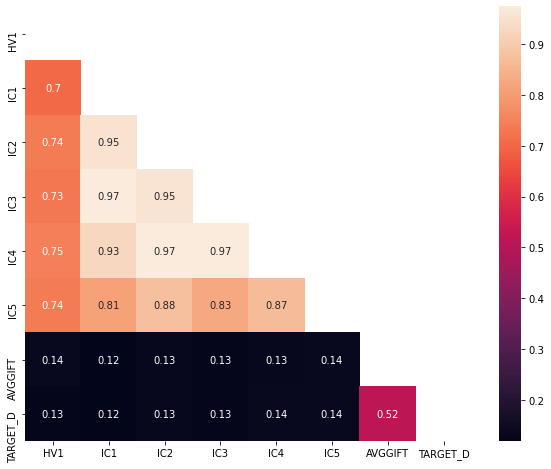

In [7]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [ ]:
# We can see that there is a very strong positive correlation between IC1 and IC2, IC2 and IC3, IC3 and IC4
# using the concept of multicollinearity, lets drop IC2, IC3 and IC4

In [8]:
data = data.drop(['IC2', 'IC3', 'IC4'],axis=1)

In [9]:
data.columns

Index(['HV1', 'IC1', 'IC5', 'AVGGIFT', 'TARGET_D'], dtype='object')

# Lesson 1.07 begins here

https://www.hangmanwords.com/play/custom-bWFjaGluZSUyMGxlYXJuaW5nJTBBaW50ZXItcXVhcnRpbGUlMjByYW5nZSUwQXJlZ3Jlc3Npb24lMEFwZWFyc29uJ3MlMjByJTBBc3lzdGVtcyUyMGRpYWdyYW0lMEFudW1weSUwQXNrbGVhcm4lMEFtZWRpYW4lMEFtYXRwbG90bGliJTBBaGlzdG9ncmFt
https://quickdraw.withgoogle.com/#
https://www.moralmachine.net/

## Lesson 1

In [ ]:
# check for normailty assumption and skewness using histograms and distribution plots 
# for the remaining variables

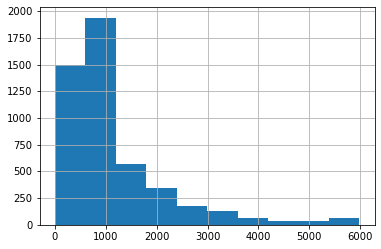

In [10]:
data['HV1'].hist()
plt.show()
#skew right - tail is on right side

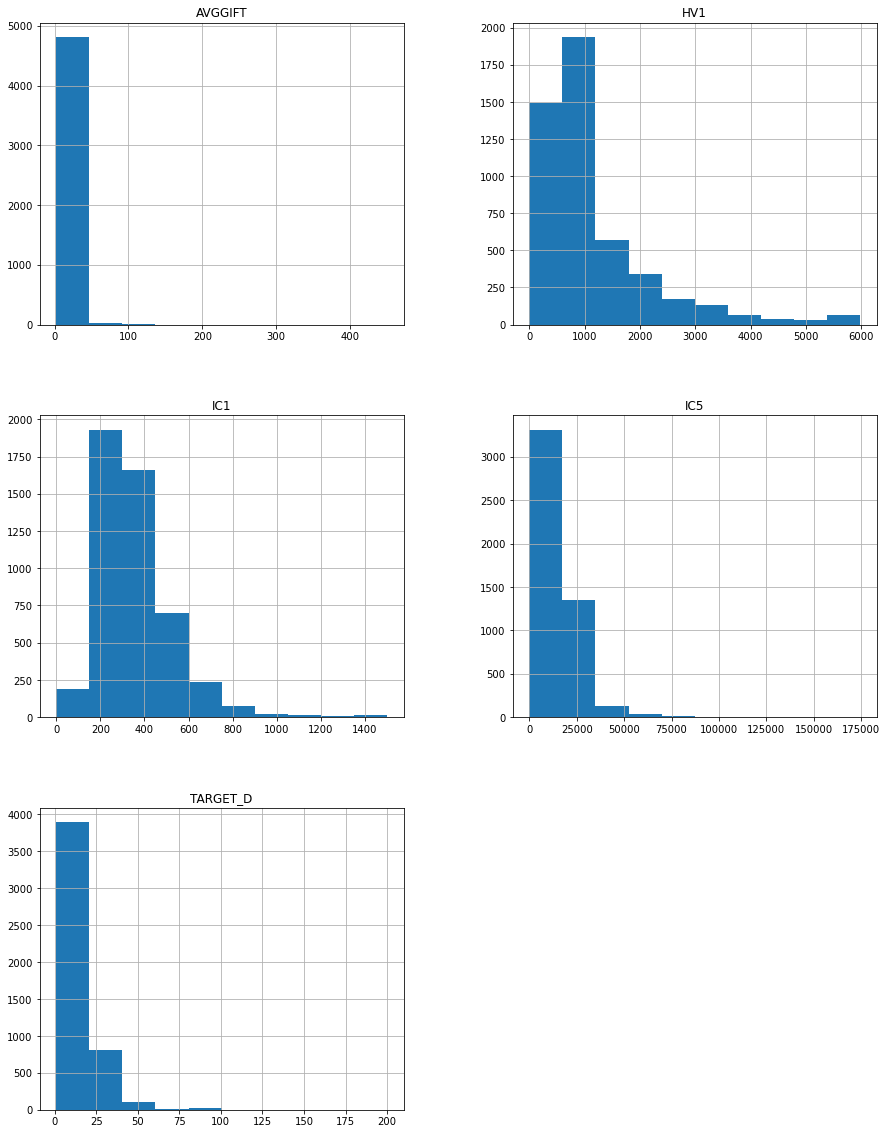

In [14]:
data.hist(figsize = (15,20));
#plt.show()

In [ ]:
sns.distplot(data['HV1'])
plt.show()

In [ ]:
sns.distplot(data['IC1'])
plt.show()

In [ ]:
sns.boxplot(x=data['IC1'])

In [ ]:
data.describe()['IC1']

In [ ]:
iqr = np.percentile(data['IC1'],75) - np.percentile(data['IC1'],25)
upper_limit = np.percentile(data['IC1'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC1'],25) - 1.5*iqr

In [ ]:
data = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]

In [ ]:
sns.distplot(data['IC1'])
plt.show()

# Lesson 2

In [ ]:
# Transformations

In [ ]:
data.head()

In [15]:
column = data["HV1"]
max_value = column.max()
max_value

5982

In [16]:
column = data["HV1"]
min_value = column.min()
min_value

0

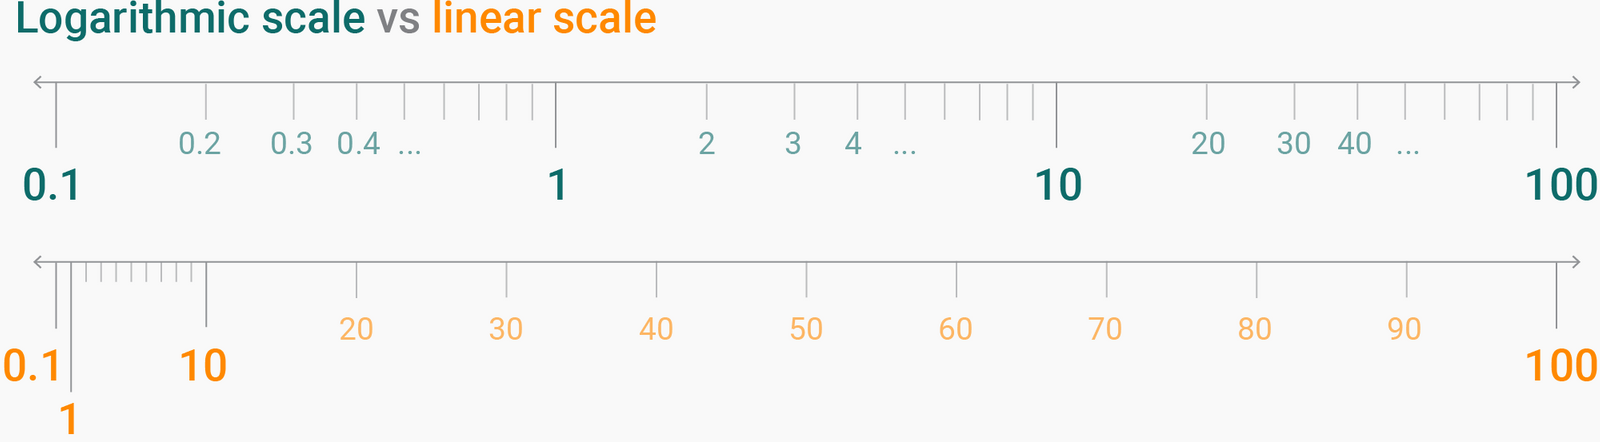

In [17]:
from IPython.display import Image
Image("logvlinear.png")

In [ ]:
# Log transformation

In [ ]:
# Since some values might become -inf, we will have to filter those values. Remember we might not able 
# to use this method if there's too many such values, and if they are important

In [ ]:
# Code to test how the transformation will look like 

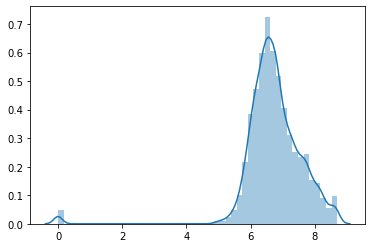

In [19]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
HV1_log = list(map(log_transfom_clean, data['HV1']))
sns.distplot(HV1_log);
#plt.show()

In [20]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later   
data['HV1_log'] = list(map(log_transfom_clean_, data['HV1']))

In [21]:
data['HV1_log'] = data['HV1_log'].fillna(np.mean(data['HV1_log']))

In [ ]:
sns.distplot(data['HV1_log'])
plt.show()

In [ ]:
data = data.drop(['HV1'], axis=1)
data.head()

# Lesson 3

In [ ]:
# Box cox transformation for making data normal

In [ ]:
# for using it in scipy, the data should be strictly positive. We will use it on 'IC1'. 
# since this is median house hold income , we can filter out negative values 

In [ ]:
# len(data[data['IC1']<=0])  # number of such observations. 
# if you do not want to lose this data, replace it with the mean of the column

In [ ]:
data['IC1_'] = np.where(data['IC1']<=0,0,data['IC1'])
# now calculate mean of the new column , exluding zeros in the count 
mean = np.sum(data['IC1_'])/len(data[data['IC1_']>0])
data['IC1_'] = data['IC1_'].replace(0,mean)

In [ ]:
data = data.drop(['IC1'], axis=1)

In [ ]:
from scipy import stats
xt, lmbda = stats.boxcox(data['IC1_'])

In [ ]:
sns.distplot(xt)
plt.show()

In [ ]:
# Repeat the same steps for column 'IC5'

In [ ]:
# for box cox transformation, we can also use sklearn's preprocessing module. It will be introduced later

In [ ]:
data.head()

In [ ]:
data['IC5_'] = np.where(data['IC5']<=0,0,data['IC5'])
mean = np.sum(data['IC5_'])/len(data[data['IC5_']>0])
data['IC5_'] = data['IC5_'].replace(0,mean)
data = data.drop(['IC5'], axis=1)
xt2, lmbda2 = stats.boxcox(data['IC5_'])

In [ ]:
data['IC1_transformed'] = xt
data['IC5_transformed'] = xt2
data = data.drop(['IC1_', 'IC5_'], axis=1)
data.head()

In [ ]:
Y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)

# Lesson 4

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('regression_data.csv')
data.head()

In [ ]:
Y = data['TARGET_D']
data = data.drop(['TARGET_D'], axis=1)

In [ ]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [ ]:
# Standardizing data 

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
# pd.DataFrame(x_normalized)

In [ ]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
# pd.DataFrame(x_standardized)

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py 